In [1]:
print('hi')

hi


In [2]:
#import matplotlib
%matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
#import ipympl
import matplotlib.font_manager

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [3]:
import agent_based_model as abm 
import importlib

In [4]:
sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)
#sns.set_context('notebook')
#sns.set_theme(palette='viridis')
#sns.set_context('talk')
#sns.set_style('whitegrid')

# debug here

In [22]:
if False:
    import json
    aparameters = { 
        'param': {'akey':123}
    }
    aparameters['param'] = json.dumps(aparameters['param'])
    aparameters['param'] = json.loads(aparameters['param'])
    # GUH stuck on 
    # AttributeError: 'str' object has no attribute 'read' 
    # bc i used load instead of loads. This library naming continues to be awful

In [6]:
#importlib.reload(abm)
#_,_,results = abm.run_custom_exp(viz=False)
#results = abm.run_default_model(viz=False)


In [7]:
#display(results)
#display(results.info)
#results.reporters
#results.info['time_stamp'][:19]

# fig 1

## fig 1 is just of the means shifted distirubtion

In [8]:
fig, ax = plt.subplots(2,1)



!-- param changes {'mean_txn_hrs': {'normal': 12, 'suspicious': 22}, 'num_agents_per_type': {'normal': 10000}}
mean_txn_hrs: modifying frozendict.frozendict({'normal': 15, 'suspicious': 22})->{'normal': 12, 'suspicious': 22}
num_agents_per_type: modifying frozendict.frozendict({'normal': 1000})->{'normal': 10000}
{'normal': 10000, 'suspicious': 200}
Completed: 96 steps
Run time: 0:00:27.654651
Simulation finished
Data saved to ap_output/BankModel_104


!-- param changes {'mean_txn_hrs': {'normal': 17, 'suspicious': 22}, 'num_agents_per_type': {'normal': 10000}}
mean_txn_hrs: modifying frozendict.frozendict({'normal': 15, 'suspicious': 22})->{'normal': 17, 'suspicious': 22}
num_agents_per_type: modifying frozendict.frozendict({'normal': 1000})->{'normal': 10000}
{'normal': 10000, 'suspicious': 200}
Completed: 96 steps
Run time: 0:00:27.542136
Simulation finished
num agents {'normal': 10000, 'suspicious': 200} {'normal': 10000, 'suspicious': 200}


/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:565: UserWarning: FixedFormatter should only be used together with FixedLocator
  rf"Normal: $\bf{hrs[i]['normal']}$00,"
/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:565: UserWarning: FixedFormatter should only be used together with FixedLocator
  rf"Normal: $\bf{hrs[i]['normal']}$00,"


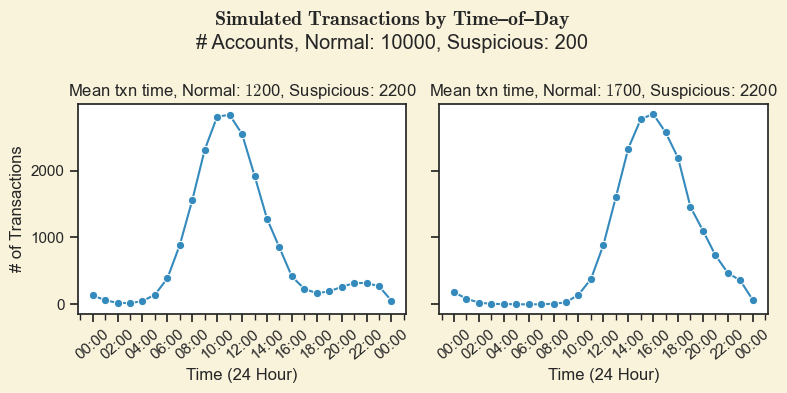

In [15]:
importlib.reload(abm)
abm.BankExpsCollection.gen_fig_1()

In [30]:
!rm ~/.matplotlib/fontlist-v330.json
!bat ~/.matplotlib/fontlist-v330.json

rm: /Users/owls/.matplotlib/fontlist-v330.json: No such file or directory
[bat error]: '/Users/owls/.matplotlib/fontlist-v330.json': No such file or directory (os error 2)


# fig 2

In [16]:
importlib.reload(abm)
fig = abm.BankExpsCollection.gen_fig_2()
fig




!-- param changes {'mean_txn_hrs': {'normal': 12, 'suspicious': 22}, 'num_agents_per_type': {'normal': 10000}}
mean_txn_hrs: modifying frozendict.frozendict({'normal': 15, 'suspicious': 22})->{'normal': 12, 'suspicious': 22}
num_agents_per_type: modifying frozendict.frozendict({'normal': 1000})->{'normal': 10000}
{'normal': 10000, 'suspicious': 1000}
Completed: 44 steps

{'normal': 1000, 'suspicious': 100}
Completed: 96 steps
Run time: 0:00:00.748193
Simulation finished
{'normal': 1000, 'suspicious': 10}
Completed: 96 steps
Run time: 0:00:00.629296
Simulation finished
{'normal': 1000, 'suspicious': 1}
Completed: 96 steps
Run time: 0:00:00.718449
Simulation finished


/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:609: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))


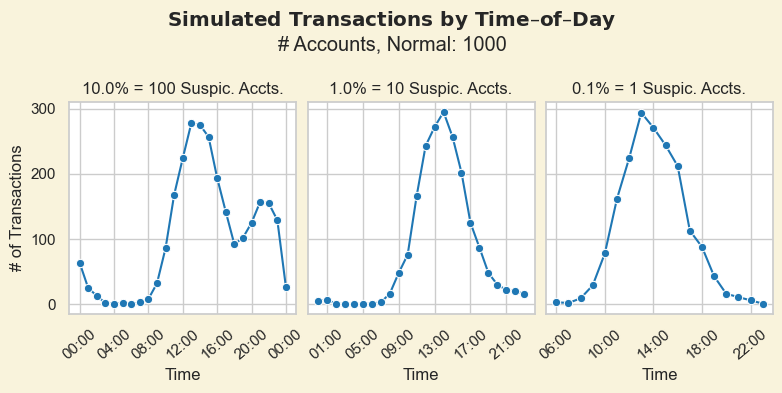

In [13]:
importlib.reload(abm)
fig = abm.BankExpsCollection.gen_fig_2()
fig


# fig 3

In [11]:
# outlier classifier: decision tree

# try ap.experiment 

In [12]:
!mkdir results

mkdir: results: File exists


In [13]:
# fig 2 is of the varying # suspicious
importlib.reload(abm)
_,_,results = abm.BankExpsCollection.run_experiment()
#results = abm.run_default_model(viz=False)

created sample;  Sample of 3 parameter combinations
created exp;  <agentpy.experiment.Experiment object at 0x29213ba00>
Scheduled runs: 1
{'normal': 1000, 'suspicious': 100}
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:00.774066
ran exp;  DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 12 keys
'reporters': DataFrame with 1 variable and 1 row
}


In [14]:
import pandas as pd
afoo = {'asbc': {1: 123}}
bfoo = pd.DataFrame()
afoo.unique()

AttributeError: 'dict' object has no attribute 'unique'


    121 for col in df.columns:
    122     s = df[col]
--> 123     if len(s.unique()) == 1:
    124         fixed_pars[s.name] = df[col][0]
    125         df.drop(col, inplace=True, axis=1)

File ~/v3/lib/python3.10/site-packages/pandas/core/series


File ~/v3/lib/python3.10/site-packages/pandas/core/series.py:2088, in Series.unique(self)
   2030 def unique(self) -> ArrayLike:
   2031     """
   2032     Return unique values of Series object.
   2033 
   (...)
   2086     Categories (3, object): ['a' < 'b' < 'c']
   2087     """

In [ ]:
!cat agent_based_model.py | grep parameters_multi

# other

In [ ]:
import agentpy as ap

In [ ]:
NUM_AGENTS_PER_TYPE = {
    'normal': 1000,
    # 'suspicious': 10, 
}

# these are send, rcv pairs 
AGENT_TYPE_PAIR_PROBS = {
    'normal': {
        'self': 0.9,
        'suspicious': 0.1 },
    'suspicious': {
        'self': 0.7,
        'normal': 0.3
    } }

MEAN_TXN_HRS = {'normal': 14,
                'suspicious': 22}

MEAN_TXN_AMOUNTS = {'normal': 250,
                    'suspicious': 50}  # this shoudl actually vary...

MEAN_NUM_TXNS = { 'normal': 4, 
                    'suspicious': 10 }
MINS_PER_STEP = 15

parameters = {
    'mean_num_txns': MEAN_NUM_TXNS,
    'mean_txn_amounts': MEAN_TXN_AMOUNTS,
    'num_agents_per_type': NUM_AGENTS_PER_TYPE,
    'agent_type_pair_probs': AGENT_TYPE_PAIR_PROBS,
    'mean_txn_hrs': MEAN_TXN_HRS,
    'mean_txn_amounts ': MEAN_TXN_AMOUNTS,
    'mean_txns': 4,  # avg num txns each agent makes
    'starting_balance': 100,
    'seed': 42,
    'mins_per_step': MINS_PER_STEP,  # 1 hr
    'steps': int(24 * (60/MINS_PER_STEP)),  # 24 hours * steps per hr
# hardcode, since can't give combo of options between the two
    'percent_sus': 1/100,
}
# --- NOTE: Setting experiment here! 
parameters_multi = dict(parameters)
parameters_multi.update({
    'percent_sus': ap.Values(10, 1, 0.1),
    })
print('parameters sweep; ', parameters_multi, 'value ', parameters['percent_sus'])

sample = ap.Sample(parameters_multi) # grid search, each repeat 1x
print('created sample; ', sample)

In [ ]:
sample

In [ ]:
exp = ap.Experiment(abm.BankModel, sample, iterations=1)
print('created exp; ', exp)
#return exp
results = exp.run()
print('ran exp; ', results)
#results.save()


In [ ]:
fig, model, results = abm.run_exp(viz=True)
plt.tight_layout()
plt.show()

In [ ]:
#   